In [1]:
import numpy as np
import seaborn as sns
import scipy.signal as signal
import matplotlib.pyplot as plt

## Analysis
The purpose of this Jupyter notebook is to help with fine-tuning the peak detection mechanism, etc, which requires a human to look over the data. All of the preprocessing is done in `interferometry.py`.

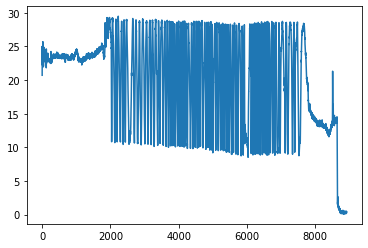

In [6]:
y_data = np.load("13_dataset.pickle.npy")
# y_data = y_data[0:5500]
plt.plot(y_data)
x = [x for x in range(len(y_data))]

In [7]:
def moving_mean(x_array, N):
    window = np.cumsum(np.insert(x_array, 0, 0)) 
    return (window[N:] - window[:-N]) / float(N)

In [14]:
mean = moving_mean(y_data, 9)
weighted_normalization = moving_mean(y_data, 100).tolist()
average = np.average(y_data)
weighted_mean = [x + average - 0.4*x*weighted_normalization[count*(len(weighted_normalization)//len(mean))]//average for count, x  in enumerate(mean.tolist())]

average_weight = np.average(weighted_mean)

stretched_weighted_mean = []
for each_x in weighted_mean:
    if each_x <= average_weight:
        for i in range(100):
            stretched_weighted_mean.append(each_x)
    else:
        for i in range(2):
            stretched_weighted_mean.append(each_x*2)
print(len(stretched_weighted_mean))
# x = 0
# stretched_weighted_mean = stretched_weighted_mean[1000*x:1000*x + 20000]
peaks = signal.find_peaks(stretched_weighted_mean, width=5, distance=100,prominence=4, wlen = 150)[0].tolist()
print(len(peaks))
# peaks = signal.find_peaks(mean, width=1, distance=2, wlen = 10)[0].tolist()
# peaks = signal.find_peaks(weighted_mean, width=5, distance=30, prominence = 1, wlen = 100)[0].tolist()

376014
75


Peaks: 75


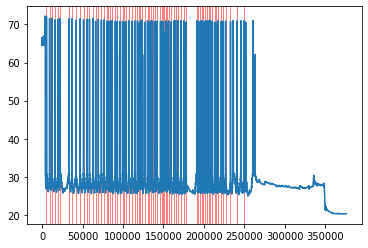

In [15]:
for count, each_peak in enumerate(peaks):
    plt.axvspan(abs(each_peak-2), each_peak+2, color='red', alpha=0.5)

# plt.plot(signal.savgol_filter(y_data, 55, 1))
# plt.plot(moving_mean(y_data, 10))
# plt.plot(mean)
# plt.plot(weighted_mean)
plt.plot(stretched_weighted_mean)
# plt.plot(y_data)
print("Peaks:", len(peaks))

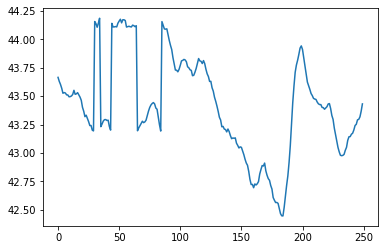

In [6]:
plt.plot(weighted_mean[150:400])

2